# PRÁCTICA 02.
# Perceptrón Simple.
__Diseño__: Erika Lilian Castillo Gutiérrez

### OBJETIVO:

Que el alumno implemente el perceptrón simple y lo aplique en distintos conjuntos de datos aplicando variaciones en la forma de aprendizaje del perceptrón.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

import json, matplotlib
s = json.load( open("styles/bmh_matplotlibrc.json") )
matplotlib.rcParams.update(s)
from IPython.core.pylabtools import figsize
figsize(11, 5)
colores = ["#348ABD", "#A60628","#06A628"]

from ipywidgets import interact, interact_manual, interactive, fixed
import ipywidgets as widgets
from IPython.display import display
import numpy as np

### Remueve esta línea de código, pues agregarás tus propias funciones
#from perceptron.Perceptron import *
#from perceptron.minimos import *

### PERCEPTRÓN

Un perceptrón simple es una unidad computacional con un umbral $\theta$, que al recibir $X \text{ de }n$ entradas reales $X = x_1, x_2, \cdots, x_n$ a través de sus pesos asociados $W = w_1, w_2, \cdots, w_n$, da una salida de valor 1 si la desigualdad $\sum_{i=1}^{n}w_ix_i \geq \theta$ se cumple, en otro caso la salida es 0.

La ley de aprendizaje se define como: $w_i(t+1) = w_i (t) + \alpha · d(x) · x_i$


$$
\
d(x)= 
\begin{cases}
1, & \text{si } x \in A;\\
-1, & \text{si } x \in B
\end{cases}
\
$$

y $\alpha$ la tasa de aprendizaje. Los pesos no se modifican si $x$ está bien clasificado.



1.- Implementa la clase Perceptron que contenga lo siguiente:
   * Inicialización del perceptrón dados los pesos iniciales.
   * Función **evalua_escalon** que reciba X y evalúe la salida utilizando la función escalón en el intervalo [0,1].
   * Función **entrena**, debe entrenar al perceptrón: modificación de los pesos en una iteración cada que se llame a esta función dada una tasa de aprendizaje.
   


In [2]:
# Clase Perceptron 
# Clase que implementa un perceptron simple y las funciones evalua_escalon y entrena

class Perceptron:
    def __init__(self, pesos):
        self.pesos = pesos
    
    def evalua_escalon(self, X):
        # Calcula la entrada ponderada
        entrada_ponderada = sum(w*x for w, x in zip(self.pesos, X))
        # Aplica la función escalón
        if entrada_ponderada >= 0:
            return 1
        else:
            return 0
    
    def entrena(self, X, etiqueta, tasa_aprendizaje):
        # Calcula la salida actual
        salida_actual = self.evalua_escalon(X)
        # Actualiza los pesos si es necesario
        if salida_actual != etiqueta:
            for i in range(len(self.pesos)):
                self.pesos[i] += tasa_aprendizaje * (etiqueta - salida_actual) * X[i]



2.- Crea un *Perceptron* de pesos iniciales aleatorios y entrénalo con el conjunto de datos datosAND con inicialización de pesos aleatorios.
    
 * Completa la función **entrenaPerceptronAND** y utiliza tu función **entrena** para que en cada paso de entrenamiento se dibuje el conjunto de datos y el plano que divide al conjunto, tal como se muestra en la figura (utiliza colores para diferenciar al conjunto de datos)
 
 <img src="figuras/foo1.png">
 
HINT1: Recuerda que el vector de pesos W contiene el vector normal al plano.
 
HINT2: Puedes utilizar la función scatter y plot_surface

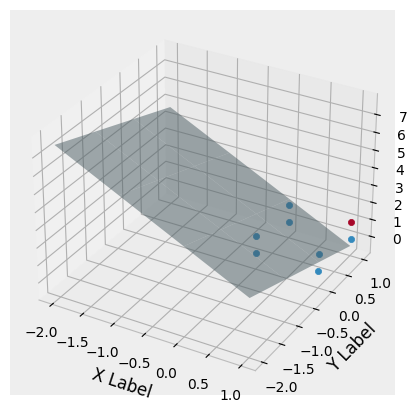

In [82]:
datosAND = np.array([[[1, 0, 0, 0]],
                     [[1, 0 ,0, 1]],
                     [[1, 0, 1, 0]],
                     [[1, 0, 1, 1]],
                     [[1, 1, 0, 0]],
                     [[1, 1, 0, 1]],
                     [[1, 1, 1, 0]],
                     [[1, 1, 1, 1]]])

respuestasAND = np.array([0,0,0,0,0,0,0,1])

indiceX = 0
pasos = 0

def dibujaPlano(ax, pesos):
    global indiceX, pasos
    # Dibujar el plano
    xx, yy = np.meshgrid(range(-2, 2), range(-2, 2))
    zz = (-pesos[0] - pesos[1] * xx - pesos[2] * yy) * 1. / pesos[3]
    ax.plot_surface(xx, yy, zz, color='lightblue', alpha=0.5)
    pasos += 1

@interact_manual()
def entrenaPerceptronAND():
    global indiceX, pasos
    x = datosAND[:,0,1]
    y = datosAND[:,0,2]
    z = datosAND[:,0,3]
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    
    # Dibujamos los datos
    for i, dato in enumerate(datosAND):
        color = colores[respuestasAND[i]]
        ax.scatter(dato[0][1], dato[0][2], dato[0][3], color=color)
    
    # Inicializamos el perceptrón con pesos aleatorios
    pesos_iniciales = np.random.rand(4) # Usamos cuatro elementos para incluir el sesgo
    perceptron = Perceptron(pesos_iniciales)
    
    # Entrenamos el perceptrón
    for i in range(100):
        for dato, etiqueta in zip(datosAND, respuestasAND):
            perceptron.entrena(dato[0], etiqueta, 0.2)  # Usamos dato[0] en lugar de dato[0][1:]
        
        # Dibujamos el plano después de cada iteración
        dibujaPlano(ax, perceptron.pesos)
        plt.pause(0.1)
        fig.canvas.draw()
        ax.clear() 

# Llamamos a la funcion para que el resultado se guarde en el notebook
entrenaPerceptronAND()

### MÍNIMOS CUADRADOS

La meta es encontrar los pesos $w$ que mejor mapean los datos de entrada en los datos objetivo. Con ese fin, se plantea la ecuación de error:

\begin{equation}
    E(w) = \frac{1}{2} \| \bar{y} − \bar{t} \|^2
\end{equation}

Con $\bar{t}$ el vector de datos objetivo, $\bar{y}$ el vector de salidas asociadas $ y(x) = X^Tw $

A partir de la ecuación anterior obtenemos:

\begin{equation}
E(w) = \frac{1}{2}(\bar{y}-\bar{t})^T(\bar{y}-\bar{t})
\end{equation}

Derivando respecto a $w$

\begin{equation}
\frac{dE(w)}{dw} = \phi(\bar{y}-\bar{t})
\end{equation}

con $\phi= [x^1  \cdots x^N] \text{ y }x^i$ el i−ésimo vector de datos de entrada a la red. $N$ el número de datos/registros de entrenamiento.

De lo anterior tenemos:

\begin{equation}
w = (\phi \phi^T)^{-1}\phi \bar{t}
\end{equation}



In [4]:

'''
Funcion que implementa el algoritmo de minimos cuadrados para el perceptron
'''
def minimos_perceptron(X, y):
    # Añadimos una columna de unos a X para el término de sesgo
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # Calculamos los pesos que minimizan la suma de los cuadrados de las diferencias
    # entre los valores observados y los valores predichos
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    
    return w

In [5]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read() #or edit path to custom.css
    return HTML(styles)
css_styling()

### ENTRENAMIENTO Y PRUEBA

Hay dos fases en el modelado con redes neuronales:
* **Fase de entrenamiento:** Se utiliza un conjunto de datos o patrones de entrenamiento
para determinar los pesos que definen el modelo. Se calculan de manera iterativa con el objeto de minimizar el error cometido entre la salida obtenida por la red neuronal y la salida deseada.

* **Fase de prueba:** Se utiliza para estimar el error de generalización del modelo.



1. Dado el conjunto de datos datos.txt anexo, entrena un perceptrón con el 70% de los datos (elegidos aleatoriamente). El otro 30% será el conjunto de prueba.

2. Para el mismo conjunto de entrenamiento, calcula los pesos $w$ con el método de mínimos cuadrados, pero con las etiquetas para las clases en $\{-1,1\}$.

2. Grafica y compara los resultados de $w$ obtenidos del entrenamiento del perceptrón y el de mínimos cuadrados. La salida debe ser similar a la figura siguiente:
<img src="figuras/min_per.png">




Pesos del perceptrón: [-0.70830294  0.1620969   0.24577364]
Pesos de mínimos cuadrados: [-1.81845304  0.55223229  0.27467182]


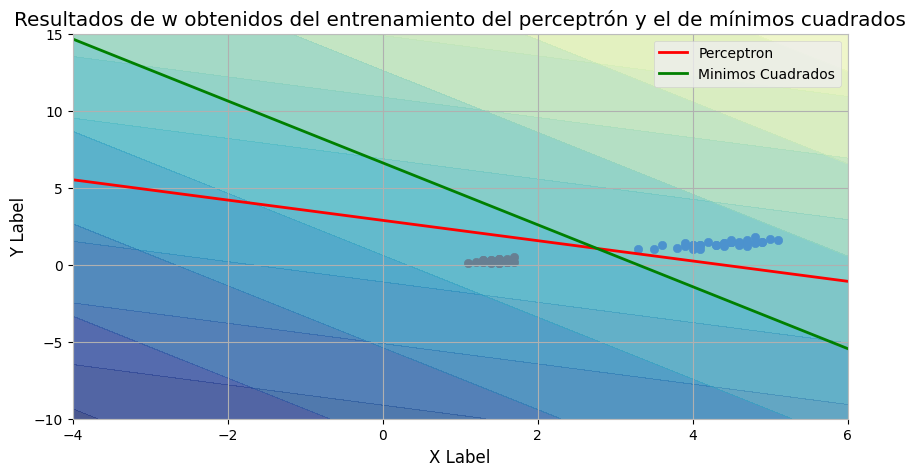

In [64]:
# Cargamos los datos
datos = np.loadtxt('datos1.txt', delimiter = ',')

# Dividimos el 70% de los datos para entrenamiento y el 30% para prueba
np.random.shuffle(datos)
n_entrenamiento = int(0.7 * len(datos))
entrenamiento = datos[:n_entrenamiento]
prueba = datos[n_entrenamiento:]

# Conjunto de entrenamiento
X_entrenamiento = entrenamiento[:, :2]  # Características
y_entrenamiento = entrenamiento[:, 2]   # Etiquetas

# Conjunto de prueba
X_prueba = prueba[:, :2]  # Características
y_prueba = prueba[:, 2]   # Etiquetas


# Entrenar el perceptrón con el 70% de los datos de entrenamiento
pesos_iniciales = np.random.rand(3)  # Inicializar pesos aleatorios
perceptron = Perceptron(pesos_iniciales)

for i in range(100):
    for dato, etiqueta in zip(X_entrenamiento, y_entrenamiento):
        dato_extendido = np.hstack(([1], dato))  # Añadir sesgo
        perceptron.entrena(dato_extendido, etiqueta, 0.2)

# Convertir las etiquetas a {-1, 1}
y_entrenamiento_binario = np.where(y_entrenamiento == 0, -1, 1)

# Calcular los pesos con el método de mínimos cuadrados
w_minimos_cuadrados = minimos_perceptron(X_entrenamiento, y_entrenamiento_binario)

# Mostrar los pesos obtenidos por ambos métodos
print("Pesos del perceptrón:", perceptron.pesos)
print("Pesos de mínimos cuadrados:", w_minimos_cuadrados)

# Graficar los datos y los planos obtenidos
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

# Graficar datos de entrenamiento
for i, (dato, etiqueta) in enumerate(zip(X_entrenamiento, y_entrenamiento)):
    color = 'r' if etiqueta == 0 else 'b'
    ax.scatter(dato[0], dato[1], color=color )

# Graficar plano del perceptrón
xx, yy = np.meshgrid(np.linspace(-4, 6, 10), 
                     np.linspace(-10, 15, 10))
zz_perceptron = (-perceptron.pesos[0] - perceptron.pesos[1] * xx - perceptron.pesos[2] * yy) * 1. / perceptron.pesos[2]
ax.contourf(xx, yy, zz_perceptron, cmap ='YlGnBu', alpha=0.5)
# Ahora dibujamos la pendiente de la recta de el perceptron
x_perceptron = np.linspace(-4, 6, 100)
y_perceptron = -perceptron.pesos[1] / perceptron.pesos[2] * x_perceptron - perceptron.pesos[0] / perceptron.pesos[2]

# Graficar la línea del perceptrón
ax.plot(x_perceptron, y_perceptron, color='red', label='Perceptron')




# Graficar plano de mínimos cuadrados
zz_minimos_cuadrados = (-w_minimos_cuadrados[0] - w_minimos_cuadrados[1] * xx - w_minimos_cuadrados[2] * yy) * 1. / w_minimos_cuadrados[2]
ax.contourf(xx, yy, zz_minimos_cuadrados, cmap ='YlGnBu', alpha=0.5)
# Ahora dibujamos la pendiente de la recta de mínimos cuadrados
x = np.linspace(-4, 6, 100)
y = -w_minimos_cuadrados[1]/w_minimos_cuadrados[2] * x - w_minimos_cuadrados[0]/w_minimos_cuadrados[2]
ax.plot(x, y, color='green', label='Minimos Cuadrados')


# Agregar leyenda
ax.legend()
# cmap='YlGnBu' es el mapa de colores Yellow-Green-Blue
# cmap ='YlOrRd' es el mapa de colores Yellow-Orange-Red
# cmap = viridis es el mapa de colores por defecto en matplotlib
# cmap ='gray' es el mapa de colores en escala de grises

# Graficar los datos y los planos obtenidos
#fig = plt.figure(figsize=(10, 5))
#ax = fig.add_subplot(111, projection='3d')  # Cambia a 'projection='3d' para usar Axes3D

# Graficar plano del perceptrón
#ax.plot_surface(xx, yy, zz_perceptron, color='blue', alpha=0.5)

# Graficar plano de mínimos cuadrados
#ax.plot_surface(xx, yy, zz_minimos_cuadrados, color='green', alpha=0.5)


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title('Resultados de w obtenidos del entrenamiento del perceptrón y el de mínimos cuadrados')

# Establecer límites de los ejes x e y
ax.set_xlim(-4, 6)
ax.set_ylim(-10, 15)

plt.show()

3. Utiliza el conjunto de prueba para obtener la exactitud de los modelos.

OBS:  El archivo datos.txt contiene 3 columnas separadas por comas, las dos primeras columnas son el valor del conjunto $X = \{x_1, x_2\}$; la tercer columna son los datos objetivo $\bar{t}$


El criterio de parada tómalo como un número fijo de iteraciones o hasta que el conjunto esté  totalmente clasificado y fija la tasa de aprendizaje a una constante.

In [84]:
# Función para calcular la precisión
def precision(w, X, y):
    # Añadir una columna de unos a X para el término de sesgo
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # Calcular la precisión
    y_pred = np.sign(X @ w)
    return np.mean(y_pred == y)

# Calcular la precisión del perceptrón
precision_perceptron = precision(perceptron.pesos, X_prueba, y_prueba)
print("Precisión del perceptrón:", precision_perceptron)

# Calcular la precisión de mínimos cuadrados
precision_minimos_cuadrados = precision(w_minimos_cuadrados, X_prueba, y_prueba)
print("Precisión de mínimos cuadrados:", precision_minimos_cuadrados)

Precisión del perceptrón: 0.43333333333333335
Precisión de mínimos cuadrados: 0.43333333333333335
